# ZAD1
Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję Z(wTV,wradio,wprasa). Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.

In [45]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab03/Advertising.csv')
print(f'Rows = {df.shape[0]}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Rows = 200


In [3]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Zaprezentowanie zbioru danych

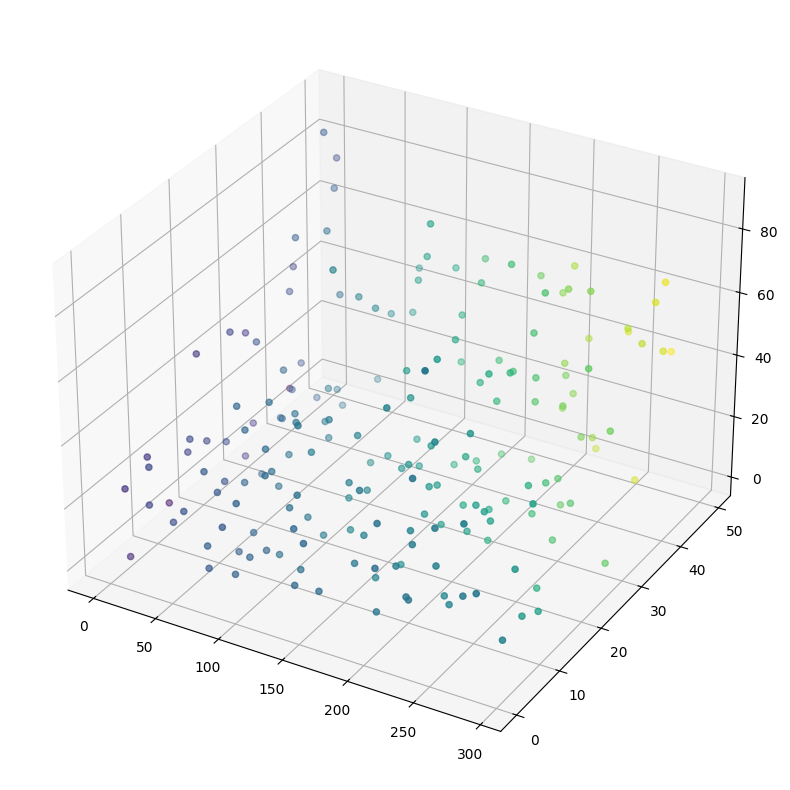

In [68]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],c=df.iloc[:,4])

Na podstawie opisu obiektu DataFrame, zauważamy, że dane należy znormalizować. Dodatkowo, wykres punktów, nie ujawnia znaczącej obecności outlierów(może jesteśmy w stanie zobaczyć ich kilka), ale spróbujemy je usunąć.

In [70]:
X = df.loc[:,'TV':'Newspaper']
y = df['Sales']
X               # mamy 200 punktow 3-wymiarowych

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [71]:
y         # mamy 200 wartosci funkcji dla kazdego z punktow

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


## Usuwanie outlierów i normalizacja

In [72]:
import numpy as np
for col in X.columns:
  mean = np.mean(X[col])
  std = np.std(X[col])
  lower_bound = mean - 3*std
  upper_bound = mean + 3*std
  df = df[(X[col] >= lower_bound) & (X[col] <= upper_bound)]

Usunięto tylko 2 outliery. Nie jest to znacząca ilość w stosunku do liczebności naszego zbioru danych więc zostawiamy.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X,columns=['TV','Radio','Newspaper']).describe()

,TV,Radio,Newspaper
count,1.980000e+02,1.980000e+02,1.980000e+02
mean,-1.984944e-16,2.691450e-17,1.794300e-16
std,1.002535e+00,1.002535e+00,1.002535e+00
min,-1.712932e+00,-1.560306e+00,-1.445347e+00
25%,-8.434913e-01,-8.908077e-01,-8.397943e-01
50%,3.592300e-02,-4.929721e-02,-2.048224e-01
75%,8.422972e-01,8.900241e-01,6.998286e-01
max,1.723765e+00,1.785499e+00,2.923456e+00


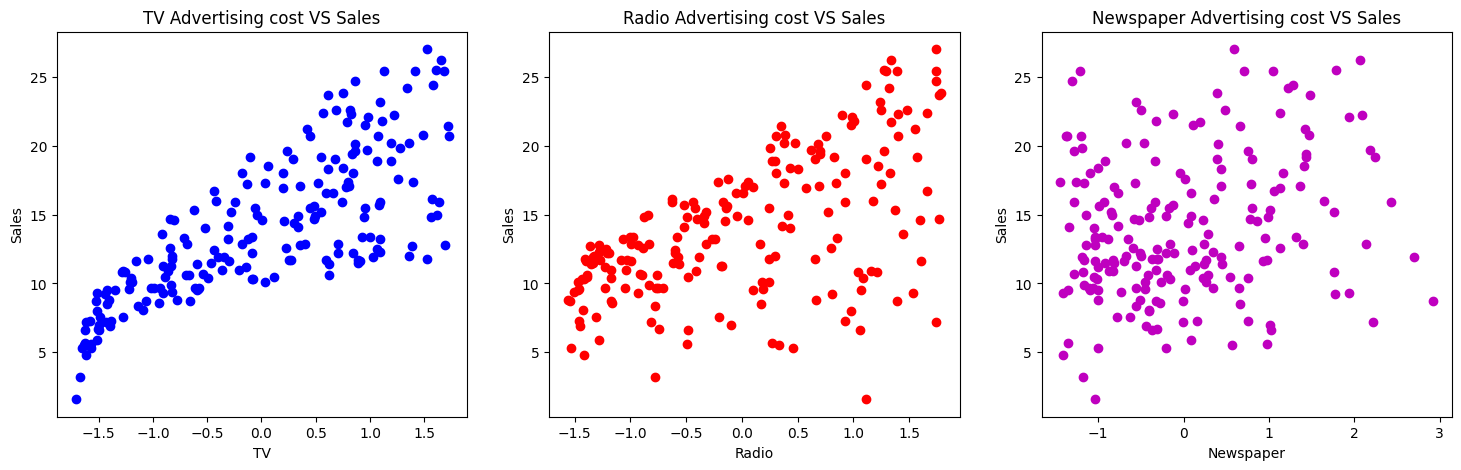

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(X[:,0],y,c='b')
axes[1].scatter(X[:,1],y,c='r')
axes[2].scatter(X[:,2],y,c='m')

for i,name in enumerate(['TV','Radio','Newspaper']):
  axes[i].set_title(f'{name} Advertising cost VS Sales')
  axes[i].set_xlabel(name)
  axes[i].set_ylabel('Sales')

In [76]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

functions = ['relu','tanh']
structures = [(100,100,100,100),(1000,1000,1000,1000)]

for structure in structures:
  for function in functions:
    print(f'Training {function = } {structure=}')
    network = MLPRegressor(solver='adam',hidden_layer_sizes=structure, max_iter = 1000, tol = 0.001, activation = function)
    network.fit(X_train,y_train)
    y_pred = network.predict(X_test)
    testing_score = network.score(X_test,y_test)
    training_score = network.score(X_train,y_train)
    print(f'Training score: {training_score}')
    print(f'Testing score: {testing_score}')
    MSE = mean_squared_error(y_test,y_pred)
    print(f'{MSE=}')
    print('-'*50)

Training function = 'relu' structure=(100, 100, 100, 100)
Training score: 0.9877262106540603
Testing score: 0.9894952520973805
MSE=0.27351185852180593
--------------------------------------------------
Training function = 'tanh' structure=(100, 100, 100, 100)
Training score: 0.9875005342359215
Testing score: 0.9743439329942704
MSE=0.6680063752265089
--------------------------------------------------
Training function = 'relu' structure=(1000, 1000, 1000, 1000)
Training score: 0.9977258592128456
Testing score: 0.9922751940147363
MSE=0.20113058031816028
--------------------------------------------------
Training function = 'tanh' structure=(1000, 1000, 1000, 1000)
Training score: 0.9918332205068604
Testing score: 0.990781358184081
MSE=0.24002554649503965
--------------------------------------------------


## Wnioski
Funkcja aktywacji 'tanh' prowadzi do wyższych wartości błędu średniokwadratowego dla tej samej strautkury sieci. Zwiększenie liczby neuronów w warstwach ukrytych modelu zmniejsza gradualnie MSE, ale jednocześnie wydłuża znacząco czas uczenia. Niemniej jednak, w zaprezentowanym przykładzie, dla różnicy rzędu prawie 10 punktów procentowych, można poczekać dłuższy czas, aby wyuczyć sieć złożoną z 1000 neuronów w kolejnych warstwach w porównanie do tej złożonej z 100 neuronów w warstwach.  
W związku z tymi wnioskami, zaprezentuję działanie sieci o jeszcze większej ilości neuronów w warstwach i funkcji aktywacji 'relu'.

In [77]:
network = MLPRegressor(solver='adam',hidden_layer_sizes=(1200,1200,1200,1200), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(X_train,y_train)
y_pred = network.predict(X_test)

Ewaluacja wybranej architektury sieci:

In [80]:
testing_score = network.score(X_test,y_test)
training_score = network.score(X_train,y_train)
print(f'Training score: {training_score}')
print(f'Testing score: {testing_score}')
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MSE = {MSE}')
print(f'RMSE = {RMSE}')
print(f'MAPE = {MAPE}%')

Training score: 0.992348348125634
Testing score: 0.990330598708625
MSE = 0.2517619596884959
RMSE = 0.5017588660786134
MAPE = 3.235346397514405%


Model uzyskał gorsze wyniki niż się spodziewałam. Zwiększenie ilości neuronów w tym przypadku doprowadziło do przetrenowania sieci. Wyniki są gorsze niż dla sieci o tej samej funkcji aktywacji ale 1000 neuronach w każdej z warstw.

# ZAD 2

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji f(x)=sin(x) w przedziale [−2π,2π]. Proszę użyć tanh jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

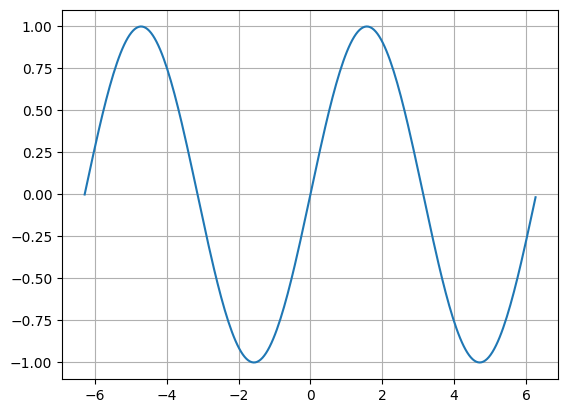

In [82]:
import numpy as np
x = np.arange(-2*np.pi,2*np.pi,0.05)
y = np.sin(x)
plt.plot(x,y)
plt.grid()

Dla aproksymacji funkcji $sin(x)$ za pomocą sieci z jedną warstwą ukrytą i funkcją aktywacji 'tanh', optymalna liczba neuronów w warstwie ukrytej wynosi 20. Dla mniejszej ilości neuronów, funkcja aproksymująca "ucieka" od funkcji aproksymowanej.

In [94]:
network = MLPRegressor(hidden_layer_sizes=(20), max_iter = 5000, tol = 1e-6, activation = 'tanh')
network.fit(x.reshape(-1,1),y)
y_pred = network.predict(x.reshape(-1,1))

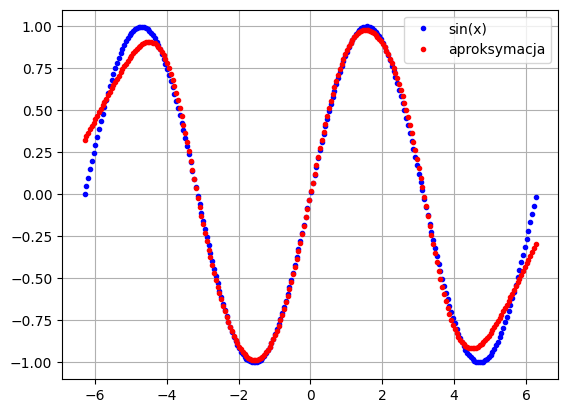

In [95]:
plt.plot(x,y,'b.',label='sin(x)')
plt.plot(x,y_pred,'r.',label='aproksymacja')
plt.legend()
plt.grid()
plt.show()

In [87]:
network.coefs_

[array([[ 0.68661466, -0.56886512,  1.23762224,  0.90437107,  1.04780732,
          0.59332861, -0.85311635,  0.87613501,  0.14399599, -1.19623185]]),
 array([[-0.8121113 ],
        [ 0.61247664],
        [ 1.06364279],
        [-1.11717913],
        [ 1.06407505],
        [-0.23695049],
        [ 0.98373087],
        [-0.77582933],
        [ 1.46631967],
        [-0.75042949]])]

In [88]:
network.intercepts_

[array([-1.19598057,  0.18818134,  0.12299492, -2.58216887, -1.32661396,
        -0.30675294, -2.10054433,  2.24219827, -0.28387099, -2.02140037]),
 array([0.23424861])]

In [89]:
wzor = ''
wewnetrzne_wagi = network.coefs_[0]
zewnetrzne_wagi = network.coefs_[1]
wewnetrzne_biasy = network.intercepts_[0]
zewnetrzne_biasy = network.intercepts_[1]

wzor+=f'tanh(\n'

for i in range(len(zewnetrzne_wagi)):
  wzor += f' \t{zewnetrzne_wagi[i][0]:.2f} * tanh( '
  wzor += f' + {wewnetrzne_wagi[0][i]:.2f} * x + {wewnetrzne_biasy[i]:.2f}'
  wzor += ')\n'

wzor += f'+ {zewnetrzne_biasy[0]:.2f})'

print(wzor)


tanh(
 	-0.81 * tanh(  + 0.69 * x + -1.20)
 	0.61 * tanh(  + -0.57 * x + 0.19)
 	1.06 * tanh(  + 1.24 * x + 0.12)
 	-1.12 * tanh(  + 0.90 * x + -2.58)
 	1.06 * tanh(  + 1.05 * x + -1.33)
 	-0.24 * tanh(  + 0.59 * x + -0.31)
 	0.98 * tanh(  + -0.85 * x + -2.10)
 	-0.78 * tanh(  + 0.88 * x + 2.24)
 	1.47 * tanh(  + 0.14 * x + -0.28)
 	-0.75 * tanh(  + -1.20 * x + -2.02)
+ 0.23)


Wzór funkcji aproksymującej:
$tanh(
 	0.45 * tanh(  -0.63 * x + 0.38)
 	-1.35 * tanh(  0.97 * x + 3.55)
 	0.01 * tanh(  -0.60 * x -0.06)
 	-1.63 * tanh(  0.88 * x -3.05)
 	1.38 * tanh(  0.79 * x + 0.08)
 	-1.77 * tanh(  -0.38 * x + 1.99)
 	0.98 * tanh(  -0.98 * x + 1.82)
 	2.60 * tanh(  0.29 * x + 1.61)
 	-0.91 * tanh(  -0.90 * x + 1.34)
 	-0.89 * tanh(  0.88 * x + 2.07) -0.51)$


# ZAD 3
Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (diabetes) z biblioteki sklearn.datasets (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta. Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2. Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.

Proszę skomentować, jak architektura sieci wpływa na aproksymację i zaproponować najmniejszą sieć, dla której wyniki są dla państwa zadowalające.

In [104]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
X.describe()     # dimentionality = 10

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [105]:
X.shape

(442, 10)

In [106]:
X.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [123]:
y=pd.DataFrame(diabetes.target)
y         # outcome = integer 25-346

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [115]:
df = pd.concat([X,y],axis=1)

for col in X.columns:
  mean = np.mean(df[col])
  std = np.std(df[col])
  lower_bound = mean - 3*std
  upper_bound = mean + 3*std
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [117]:
df.shape

(429, 11)

In [119]:
X_scaled=StandardScaler().fit_transform(df.iloc[:,:-1])
X_scaled = pd.DataFrame(X_scaled,columns=diabetes.feature_names)
X_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,429.000000,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02
mean,0.000000,1.035173e-17,1.863311e-17,8.281384e-18,3.312554e-17,3.312554e-17,-2.070346e-17,-2.484415e-17,-2.484415e-17,-3.105519e-17
std,1.001168,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00
min,-2.240482,-9.433281e-01,-1.936282e+00,-2.377155e+00,-2.694627e+00,-2.485255e+00,-2.307483e+00,-1.690180e+00,-2.658096e+00,-2.883183e+00
25%,-0.794661,-9.433281e-01,-7.199443e-01,-7.010888e-01,-7.091450e-01,-6.380718e-01,-7.147071e-01,-8.593818e-01,-7.141903e-01,-7.034187e-01
50%,0.118490,-9.433281e-01,-1.351668e-01,-1.181094e-01,-5.719580e-02,-6.082716e-02,-1.278950e-01,-2.858409e-02,-5.145128e-02,-5.894003e-03
75%,0.803352,1.060077e+00,6.835218e-01,7.323119e-01,5.947534e-01,6.182842e-01,6.265778e-01,8.022136e-01,6.807545e-01,6.044401e-01
max,2.325269,1.060077e+00,2.999241e+00,2.796788e+00,2.906210e+00,2.872934e+00,3.225317e+00,2.962288e+00,2.854539e+00,2.871395e+00


In [139]:
Y = pd.DataFrame(df.iloc[:,-1])

In [144]:
#X_scaled.values, Y.values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled.values,Y.values,test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()  # solving problem with column vector

## Standaryzuję również etykiety wyjściowe, ze względu na bardzo słabe wyniki modelu (MES rzędu kilku tysięcy, R^2 nie wychodziło poza 0.1)

In [166]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [182]:
from sklearn.metrics import mean_absolute_percentage_error

architectures = [(10,10),(20,8,8),(20,10),(20,20),(50,20,20),(50,50),(100,100),(100,100,100),(1000,1000)]
results = []

for architecture in architectures:
  print(f'Training {architecture=}')
  network = MLPRegressor(hidden_layer_sizes=architecture, max_iter = 2000, tol=0.001)
  network.fit(X_train,y_train)
  y_pred = network.predict(X_test)
  print(f'Evaluation of model: ')
  MSE = mean_squared_error(y_test,y_pred)
  MAPE = mean_absolute_percentage_error(y_test,y_pred)
  R2 = network.score(X_test,y_test)           # współczynnik determinacji
  results.append((architecture,MSE,MAPE,R2))

resdf = pd.DataFrame(results,columns=['architecture','MSE','MAPE','R2'])
resdf

Training architecture=(10, 10)
Evaluation of model: 
Training architecture=(20, 8, 8)
Evaluation of model: 
Training architecture=(20, 10)
Evaluation of model: 
Training architecture=(20, 20)
Evaluation of model: 
Training architecture=(50, 20, 20)
Evaluation of model: 
Training architecture=(50, 50)
Evaluation of model: 
Training architecture=(100, 100)
Evaluation of model: 
Training architecture=(100, 100, 100)
Evaluation of model: 
Training architecture=(1000, 1000)
Evaluation of model: 


,architecture,MSE,MAPE,R2
0,"(10, 10)",0.684588,1.522538,0.345742
1,"(20, 8, 8)",0.574607,1.759042,0.450851
2,"(20, 10)",0.533765,1.551681,0.489883
3,"(20, 20)",0.652572,1.879066,0.376340
4,"(50, 20, 20)",0.702215,2.106594,0.328897
5,"(50, 50)",0.549994,1.728484,0.474374
6,"(100, 100)",0.705209,1.982553,0.326035
7,"(100, 100, 100)",0.901181,2.276336,0.138746
8,"(1000, 1000)",0.835460,2.118692,0.201555


## Wnioski
Dla analizowanego zbioru danych cukrzycowych, najlepsze wyniki predykcyjne uzyskują modele o prostej architekturze, charakteryzujące się niewielką liczbą warstw ukrytych i małą liczbą neuronów w tych warstwach. Istnieje dolny próg złożoności modelu, poniżej którego dalsze upraszczanie architektury prowadzi do pogorszenia wyników. Najlepsze wyniki uzyskano dla modelu z dwiema warstwami: (20,10). Jest on jednocześnie najmniejszą siecią, dla której wyniki są zadowalające.

## Wykres dla najlepszego modelu

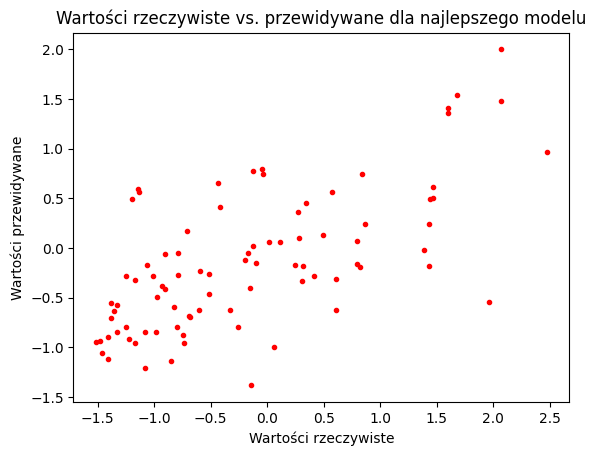

In [186]:
best_model = MLPRegressor(hidden_layer_sizes=(20,10), max_iter = 2000, tol=0.001)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
plt.plot(y_test, y_pred,'r.')
plt.xlabel("Wartości rzeczywiste")
plt.ylabel("Wartości przewidywane")
plt.title("Wartości rzeczywiste vs. przewidywane dla najlepszego modelu")
plt.show()

# ZAD 4
Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach

In [187]:
epochs = np.arange(1,5000,100)
MSEs = []
R2s = []

for i in epochs:
  best_model = MLPRegressor(hidden_layer_sizes=(20,10), max_iter = i, tol=0.001)
  best_model.fit(X_train,y_train)
  y_pred = best_model.predict(X_test)
  MSE = mean_squared_error(y_test,y_pred)
  R2 = best_model.score(X_test,y_test)
  MSEs.append(MSE)
  R2s.append(R2)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


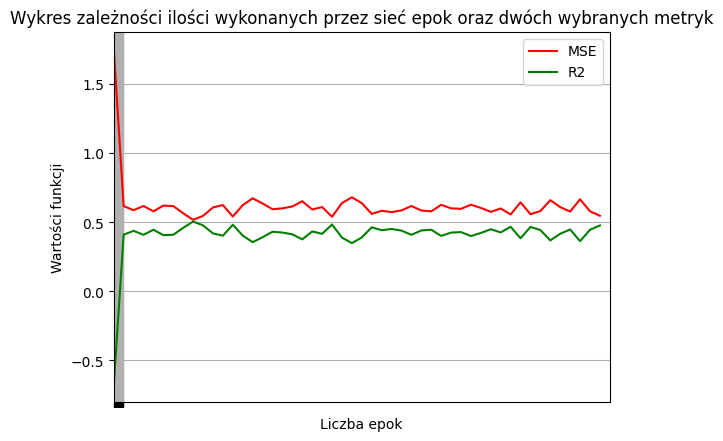

In [198]:
fig,ax = plt.subplots()
plt.plot(epochs,MSEs, 'r')
plt.plot(epochs,R2s, 'g')
plt.title('Wykres zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk')
plt.xlabel('Liczba epok')
plt.ylabel('Wartości funkcji')
plt.legend(['MSE','R2'])
plt.xlim(1,5000)
plt.xticks(np.arange(1,100,2))
ax.set_xticklabels([])
plt.grid()
plt.show()

## Wnioski
W przypadku zbioru danych diabetes, wartość błedu średniokwadratowego spada, natomiast wartość wpółczynnika determinacji R^2 rośnie. W okolicy 100 epok, wartości MSE i R^2 stabilizują się, oscylując wokół osiągniętego progu. Nie ma zatem sensu zwiększanie ilości epok ponad 100 dla tego zbioru danych.  
Wynik jest spójny z wynikami z poprzednich laboratoriów, gdzie zaobserwowaliśmy istnienie progu liczby epok, powyżej którego model nie ulega dalszej poprawie, a wręcz może ulec pogorszeniu w wyniku przetrenowania.

# ZAD5
Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru diabetes. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.

Dla danych z których korzystaliśmy wcześniej:


In [199]:
X_scaled, Y

(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.803352  1.060077  1.361864  0.464870 -0.916583 -0.733147 -0.966198   
 1   -0.033702 -0.943328 -1.094202 -0.555344 -0.146098 -0.393592  1.716372   
 2    1.792598  1.060077  0.987606 -0.118109 -0.946217 -0.719565 -0.714707   
 3   -1.860003 -0.943328 -0.228731 -0.773961  0.298413  0.563955 -0.798537   
 4    0.118490 -0.943328 -0.766727  0.464870  0.120609  0.360222  0.207426   
 ..        ...       ...       ...       ...       ...       ...       ...   
 424 -1.175140 -0.943328 -1.585415 -1.065451 -0.501707 -0.998001  2.135523   
 425  0.879448  1.060077  0.449611  1.266467 -0.086830 -0.033663 -0.630877   
 426 -0.109798  1.060077 -0.322296 -1.429813  1.098532  1.738818 -0.630877   
 427  0.879448  1.060077 -0.322296  0.367950 -0.768413 -0.278143 -0.547046   
 428 -0.946852 -0.943328  0.870651  0.027635  0.387315  0.353431 -0.630877   
 
            s4        s5        s6  
 0   -0.028584  0.441201 

In [202]:
Y_scaled = StandardScaler().fit_transform(Y)

In [227]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [228]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,Y_scaled.ravel(),test_size=0.2)
best_model = MLPRegressor(hidden_layer_sizes=(20,10), max_iter = 1000, tol=0.001)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
R2 = best_model.score(X_test,y_test)
print(f'MSE = {MSE}')
print(f'R2 = {R2}')

MSE = 0.7283757906042088
R2 = 0.21650988721506548


## Wnioski
Zastosowanie PCA do redukcji wymiarowości danych w analizowanym przypadku generalnie pogorszyło wyniki predykcji modelu sieci neuronowej. Oznacza to, że usunięcie części informacji zawartej w oryginalnych danych wpłynęło negatywnie na zdolność modelu do efektywnego uczenia się i generalizacji.  
Spośród testowanych wartości liczby komponentów wynikowych PCA, najlepsze rezultaty uzyskano dla redukcji wymiarowości do 4 wymiarów. W tym przypadku wyniki predykcji były porównywalne z wynikami uzyskanymi dla optymalnej sieci neuronowej bez redukcji wymiarowości.
Dla innych wartości liczby wymiarów wynikowych, obserwowano znaczące pogorszenie wartości MSE oraz R^2.

In [229]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/Lab03/lab03.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Lab03/lab03.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 882992 bytes to /content/drive/My Drive/Colab Notebooks/Lab03/lab03.html
